In [7]:
import numpy as np
import random
from matplotlib import pyplot as plt


In [8]:
#function to calculate 1000 decay time values at a maximum of 10 microseconds 
#and return the estimated lifetime from the mean of these.

def decay_times():
    randmax = 1- np.exp(-10/2.2)                #Calculated to limit time values to 10 microseconds
    y = np.random.uniform(0,randmax,1000)       #Generate 1000 random numbers between between 0 and randmax
    tau = 2.2
    t = - tau*np.log(1-y)                       #inverse cumulative function to calculate decay times 
    est_tau = np.mean(t)                        #estimate tau from decay times
    return  t,est_tau

"""
def decay_times_while():
    tau = 2.2* 10**(-6)
    count =0
    t = [] 

    while count < 1000:
        y = np.random.uniform(0,1,1) 
        t_element = - tau*np.log(1-y)
        
        if t_element < 10*10**(-6):
            t.append(t_element)
            count += 1
    
    est_tau = np.mean(t)
            
    return  t,est_tau
    
"""

'\ndef decay_times_while():\n    tau = 2.2* 10**(-6)\n    count =0\n    t = [] \n\n    while count < 1000:\n        y = np.random.uniform(0,1,1) \n        t_element = - tau*np.log(1-y)\n        \n        if t_element < 10*10**(-6):\n            t.append(t_element)\n            count += 1\n    \n    est_tau = np.mean(t)\n            \n    return  t,est_tau\n    \n'

Estimated lifetime is 2.102 microseconds


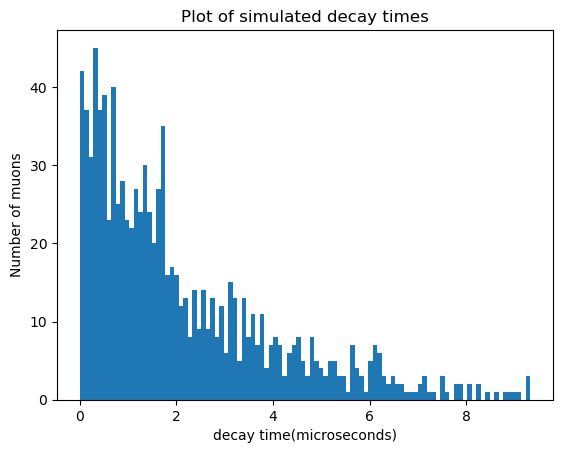

In [9]:
t, est_tau = decay_times()
tau = 2.2
print("Estimated lifetime is {:.4g} microseconds".format(est_tau))
nbins = 100

plt.hist(t, bins = nbins)
plt.title('Plot of simulated decay times')
plt.ylabel('Number of muons')
plt.xlabel('decay time(microseconds)')
plt.show()


In [10]:
#2.10 microseconds
#The lifetime of the muon is 2.2 microseconds.
#We are getting the average slightly lower than 2.2 microseconds because the time has been capped at 10 microseconds.
#By removing the right tail of the distribution, the average is shifted to the left (down).

Average of average lifetimes is 2.097 microseconds


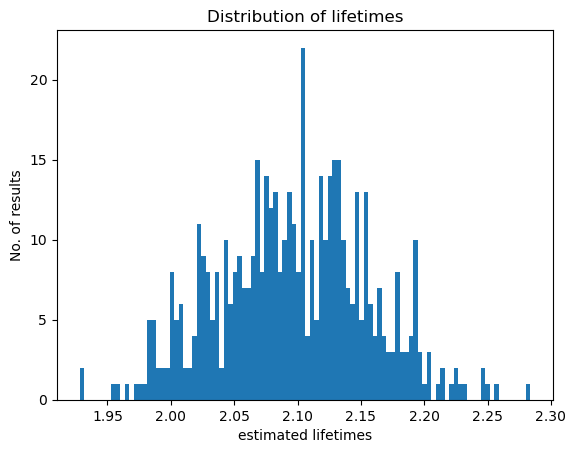

In [11]:
iterations= 500
tau_vec = np.zeros(iterations)     #array to store average lifetime calculated in each experiment
for i in range(iterations):
    t, est_tau = decay_times()
    tau_vec[i] = est_tau
mean = np.mean(tau_vec)            #calculates mean of average lifetime
print("Average of average lifetimes is {:.4g} microseconds".format(mean))
nbins = 100
plt.hist(tau_vec, bins = nbins)
plt.title('Distribution of lifetimes')
plt.xlabel('estimated lifetimes')
plt.ylabel('No. of results')
plt.show()
  

In [12]:
#precision
std = np.std(tau_vec)
print("The precision is {:.4g} microseconds".format(std))
#The precision of the data is the standard deviation.This is how spread out the data points for the 500 average lifetimes are.
#We can expect to measure the liftetime in a single experiment with a precision of 0.06 microseconds. This is the standard 
#deviation of the sample.

#bias
bias = abs(tau-mean)
print("The bias is {:.4g} microseconds".format(bias))
#The bias is calculated by taking the difference between the true value and experimental value of the lifetime averaged over the
#500 experiments. This indicates how accurate the experiment is.
#The experiment is biased since only decay times below 10 microseconds have been simulated. Afte running 500 experiments,the
#averge lifetime is outside of one standard deviation but within two standard deviations of the literature value of 2.2 microseconds

#precision of bias 
error = std/np.sqrt(iterations)
print("The precision of the bias is {:.4g} microseconds".format(error))
#This is the standard error on the mean (standard deviation over square root of the number of data points).
#It is the precision of the discrepancy between the mean value we calculated and the true (literature) value 2.2 microseconds.

The precision is 0.05953 microseconds
The bias is 0.1033 microseconds
The precision of the bias is 0.002662 microseconds
